In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

In [3]:
from connectivity_problem.percolation import Percolation, PercolationGraphic

In [4]:
from connectivity_problem.weighted_quick_union import WeightedQuickUnionUF
from connectivity_problem.compressed_quick_union import CompressedQuickUnionUF

In [5]:
p = PercolationGraphic(20, 0.6)

In [6]:
p.percolates(), p.num**2, np.sum(p.array.flatten())

(True, 400, 240)

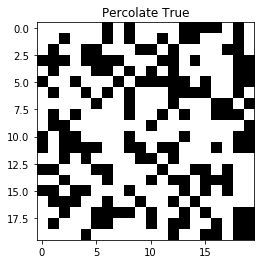

In [7]:
# fig, ax = plt.subplots(1,1)
plt.title(f"Percolate {p.percolates()}")
plt.imshow(p.array, interpolation="none", cmap="gray")
plt.show()

In [8]:
p2 = Percolation(20, int(0.6 * 20**2))

In [9]:
np.sum(p2.array)

240

In [10]:
flag = p2.percolates(alg=WeightedQuickUnionUF)
flag

True

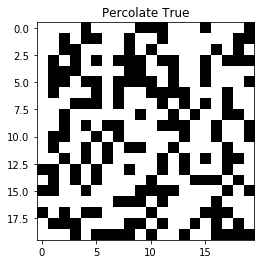

In [11]:
plt.title(f"Percolate {flag}")
plt.imshow(p2.array, interpolation="none", cmap="gray")
plt.show()

In [12]:
num = 36
experiment_num = 40

In [13]:
%%time
p = np.arange(num**2)
val = np.zeros(shape=(num**2, experiment_num), dtype=bool)
for _p in p:
    for ex in range(experiment_num):
        per = Percolation(num, _p)
        val[_p, ex] = per.percolates(alg=CompressedQuickUnionUF)

CPU times: user 3min 7s, sys: 15.5 ms, total: 3min 8s
Wall time: 3min 8s


In [ ]:
plt.plot(p / num**2, val.mean(axis=1))